![](apple.gif)

- [alpha blend](https://docs.opencv.org/3.4.0/d5/dc4/tutorial_adding_images.html)
- [mask and input](https://docs.opencv.org/3.4.0/d0/d86/tutorial_py_image_arithmetics.html)

In [2]:
%matplotlib inline 

from __future__ import print_function
# these imports let you use opencv
import cv2          # opencv itself
import numpy as np  # matrix manipulations
from matplotlib import pyplot as plt           # this lets you draw inline pictures in the notebooks

In [3]:
import pylab                                   # this allows you to control figure size 
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # this controls figure size in the notebook

In [4]:
# cap = cv2.VideoCapture(0)
# ret, frame = cap.read()
# if ret:
#     frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
#     plt.imshow(frame)

# cap.release()

In [5]:
# img = frame.copy()

# # convert our image to grayscale
# gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# plt.subplot(1,2,1)
# plt.imshow(img)
# plt.subplot(1,2,2)
# plt.imshow(gray)

# # load the haar face detector for the front
# face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
# eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

# faces = face_cascade.detectMultiScale(gray, 1.3, 5)
# for (x,y,w,h) in faces:
#     cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
#     roi_gray = gray[y:y+h, x:x+w]
#     roi_color = img[y:y+h, x:x+w]
#     eyes = eye_cascade.detectMultiScale(roi_gray)
#     for (ex,ey,ew,eh) in eyes:
#         cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

In [77]:
class FaceDetect(object):
    def __init__(self):
        self.face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
        self.eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
        
    def findFacesEyes(self, img):
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        faces = self.face_cascade.detectMultiScale(gray, 1.3, 5)
        
        ans = []
        
        for (x,y,w,h) in faces:
            face = {'head': (x,y,w,h)}
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w]
            eyes = self.eye_cascade.detectMultiScale(roi_gray)
            face['eyes'] = eyes
            
            ans.append(face)
            
        return ans
    
    def drawDetectMarker(self, img, num_found):
        # updae marker: green - faces, red - none
        if num_found > 0 :
            mcolor = (0,255,0)
            print('Faces found:', num_found)
        else:
            mcolor = (255,0,0)
            print('No faces found')
            
        cv2.circle(img, (20,20), 10, mcolor, -1)

class Brows(FaceDetect):
    def __init__(self):
        FaceDetect.__init__(self)
        
    def draw(self, in_img, color=(0,0,0)):
        img = in_img.copy()
        faces = self.findFacesEyes(img)
        for face in faces:
            x,y,w,h = face['head']
            roi_color = img[y:y+h, x:x+w]
            if 'eyes' in face:
                for eye in face['eyes']:
                    (ex,ey,ew,eh) = eye
                    w = 15
                    ul = (ex,ey)
                    lr = (ex+ew,ey-w)
                    cv2.rectangle(roi_color,ul,lr,color,-1)
            
        
        # updae marker: green - faces, red - none
        self.drawDetectMarker(img, len(faces))
        return img

class Unibrow(FaceDetect):
    def __init__(self):
        FaceDetect.__init__(self)
        
    def draw(self, in_img, color=(0,0,0)):
        img = in_img.copy()
        faces = self.findFacesEyes(img)
        for face in faces:
            x,y,w,h = face['head']
            roi_color = img[y:y+h, x:x+w]
            if 'eyes' in face:
                for eye in face['eyes']:
                    (ex,ey,ew,eh) = eye
                    w = 15
                    ul = (ex,ey)
                    lr = (ex+ew,ey-w)
                    cv2.rectangle(roi_color,ul,lr,color,-1)
        self.drawDetectMarker(img, len(faces))
        return img

Faces found: 2


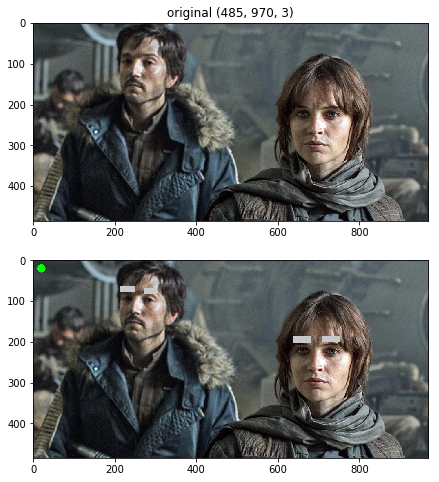

In [78]:
rogue = cv2.imread('rogue-one.jpg')
rogue = cv2.cvtColor(rogue, cv2.COLOR_BGR2RGB)

plt.subplot(2,1,1)
plt.imshow(rogue)
plt.title('original {}'.format(rogue.shape))

brows = Brows()
ro = brows.draw(rogue, color=(200,200,200))
plt.subplot(2,1,2)
plt.imshow(ro);

In [75]:
class Hat(FaceDetect):
    def __init__(self, hat, PNG=False):
        FaceDetect.__init__(self)
        if PNG:
            hat = cv2.imread(hat, cv2.IMREAD_UNCHANGED)  # RGBA
            hat = cv2.cvtColor(hat, cv2.COLOR_BGRA2RGBA)
#             (B, G, R, A) = cv2.split(hat)
#             print(A)
#             B = cv2.bitwise_and(B, B, mask=A)
#             G = cv2.bitwise_and(G, G, mask=A)
#             R = cv2.bitwise_and(R, R, mask=A)
#             self.hat = cv2.merge([B, G, R, A])
            self.hat = hat
            print('hat.shape:', self.hat.shape)
        else:
            hat = cv2.imread(hat, 1)  # RGB
            self.hat = cv2.cvtColor(hat, cv2.COLOR_BGR2RGB)
            
    def draw(self, in_pic, where):
        faces = self.findFacesEyes(in_pic)
        pic = cv2.cvtColor(in_pic, cv2.COLOR_RGB2RGBA)
        # where: (x0,x1, y0,y1)
        
        
        overlay = np.zeros(pic.shape, dtype="uint8")
        for face in faces:
            x0,y0,w,h = face['head']
            h,w = self.hat.shape[:2]
            overlay[y0:h,x0:w] = self.hat
    #         cv2.addWeighted(overlay, 1.0, pic, 1.0, 0, pic)
    #         pic[y0:h,x0:w] = self.hat
        pic = pic + overlay
        return pic
        

In [76]:
pirate = Hat('pirate_hat.png', True)
r = pirate.draw(rogue, (0,0))
plt.imshow(r)

hat.shape: (249, 300, 4)


ValueError: could not broadcast input array from shape (249,300,4) into shape (219,124,4)

In [56]:
help(cv2.merge)

Help on built-in function merge:

merge(...)
    merge(mv[, dst]) -> dst
    .   @overload
    .   @param mv input vector of matrices to be merged; all the matrices in mv must have the same
    .   size and the same depth.
    .   @param dst output array of the same size and the same depth as mv[0]; The number of channels will
    .   be the total number of channels in the matrix array.



In [10]:
# ds = cv2.imread('death-star.jpg')
# ds = cv2.cvtColor(ds, cv2.COLOR_BGR2RGB)

# plt.subplot(2,1,1)
# plt.imshow(ds)
# plt.title('original {}'.format(ds.shape))

# dds = brows.draw(ds, color=(200,200,200))
# plt.subplot(2,1,2)
# plt.imshow(dds);

Faces found: 1


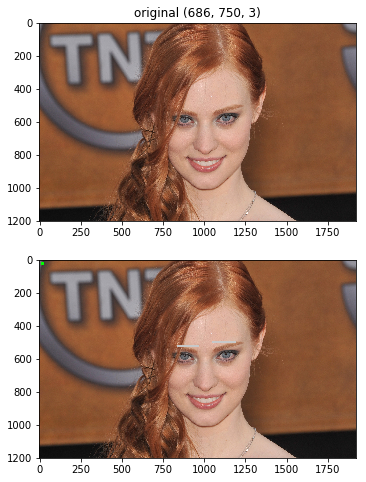

In [67]:
woll = cv2.imread('woll.jpg')
woll = cv2.cvtColor(woll, cv2.COLOR_BGR2RGB)

plt.subplot(2,1,1)
plt.imshow(woll)
plt.title('original {}'.format(ds.shape))

fwoll = brows.draw(woll, color=(200,200,200))
plt.subplot(2,1,2)
plt.imshow(fwoll);

pic: (485, 970, 4)
hat (249, 300, 4)
overlay (485, 970, 4)


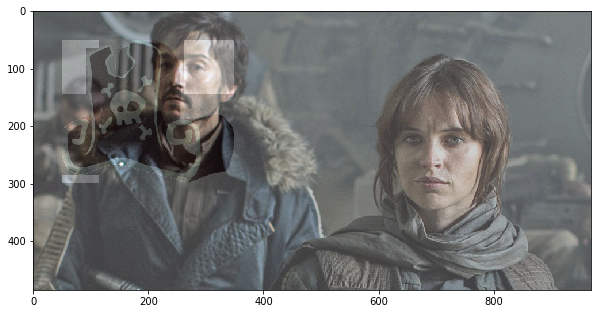

In [91]:
pic = cv2.cvtColor(rogue, cv2.COLOR_RGB2RGBA)
print('pic:', pic.shape)

hat = cv2.imread('pirate_hat.png', cv2.IMREAD_UNCHANGED)  # RGBA
hat = cv2.cvtColor(hat, cv2.COLOR_BGRA2RGBA)
print('hat', hat.shape)

overlay = np.zeros(pic.shape, dtype="uint8")
print('overlay',  overlay.shape)

x0,y0 = 50,50
h,w = hat.shape[:2]
overlay[y0:y0+h,x0:x0+w] = hat

alpha = 0.75
beta = (1.0 - alpha)
pic = cv2.addWeighted(pic, alpha, overlay, beta, .75)
plt.imshow(pic)

pic: (485, 970, 3)
hat (176, 200, 3)


Text(0.5,1,u'Final')

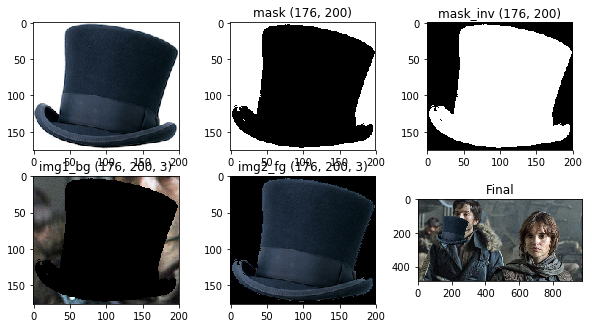

In [122]:
pic = rogue.copy()
print('pic:', pic.shape)

hat = cv2.imread('top.jpg', 1)
hat = cv2.cvtColor(hat, cv2.COLOR_BGR2RGB)
print('hat', hat.shape)
plt.subplot(3,3,1)
plt.imshow(hat)

h,w = hat.shape[:2]
x,y = 100,100
roi = pic[y:y+h,x:x+w]

# create mask
gray = cv2.cvtColor(hat,cv2.COLOR_RGB2GRAY)
ret, mask = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

plt.subplot(3,3,2)
plt.imshow(mask, cmap='gray')
plt.title('mask {}'.format(mask.shape))
plt.subplot(3,3,3)
plt.imshow(mask_inv, cmap='gray')
plt.title('mask_inv {}'.format(mask_inv.shape))

# Now black-out the area of hat in ROI
# essentially, cut out where the hat goes in the image
img1_bg = cv2.bitwise_and(roi,roi,mask = mask)
plt.subplot(3,3,4)
plt.imshow(img1_bg)
plt.title('img1_bg {}'.format(img1_bg.shape))

# Take only region of hat from logo image.
# essentially, remove the unwanted background and leave only the hat
img2_fg = cv2.bitwise_and(hat,hat,mask = mask_inv)
plt.subplot(3,3,5)
plt.imshow(img2_fg)
plt.title('img2_fg {}'.format(img2_fg.shape))

# Put hat in ROI and modify the main image
cv2.add(img1_bg,img2_fg, roi)  # returns a new result image, so pass the roi as the destination

plt.subplot(3,3,6)
plt.imshow(pic)
plt.title('Final')

In [123]:
# help(cv2.add)

pic: (485, 970, 3)


Text(0.5,1,u'Final')

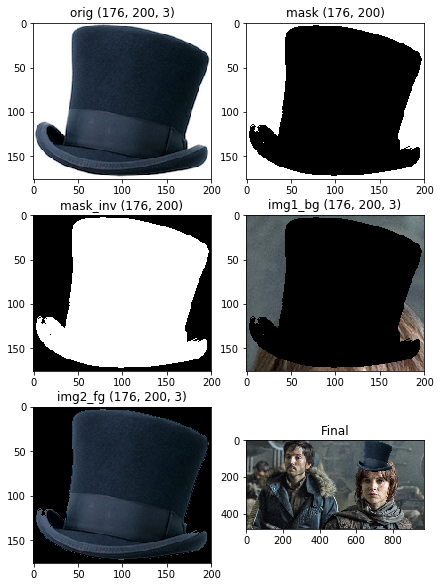

In [133]:
pic = rogue.copy()
print('pic:', pic.shape)

hat = cv2.imread('top.jpg', 1)
hat = cv2.cvtColor(hat, cv2.COLOR_BGR2RGB)

h,w = hat.shape[:2]
y,x = 0,600
roi = pic[y:y+h,x:x+w]

# create mask
gray = cv2.cvtColor(hat,cv2.COLOR_RGB2GRAY)
ret, mask = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

# Now black-out the area of hat in ROI
# essentially, cut out where the hat goes in the image
img1_bg = cv2.bitwise_and(roi,roi,mask = mask)

# Take only region of hat from logo image.
# essentially, remove the unwanted background and leave only the hat
img2_fg = cv2.bitwise_and(hat,hat,mask = mask_inv)

# Put hat in ROI and modify the main image
# returns a new result image, so pass the roi as the destination
dst = cv2.add(img1_bg,img2_fg, roi)

pylab.rcParams['figure.figsize'] = (7.0, 10.0)

plt.subplot(3,2,1)
plt.imshow(hat)
plt.title('orig {}'.format(hat.shape))

plt.subplot(3,2,2)
plt.imshow(mask, cmap='gray')
plt.title('mask {}'.format(mask.shape))

plt.subplot(3,2,3)
plt.imshow(mask_inv, cmap='gray')
plt.title('mask_inv {}'.format(mask_inv.shape))

plt.subplot(3,2,4)
plt.imshow(img1_bg)
plt.title('img1_bg {}'.format(img1_bg.shape))

plt.subplot(3,2,5)
plt.imshow(img2_fg)
plt.title('img2_fg {}'.format(img2_fg.shape))

plt.subplot(3,2,6)
plt.imshow(pic)
plt.title('Final')

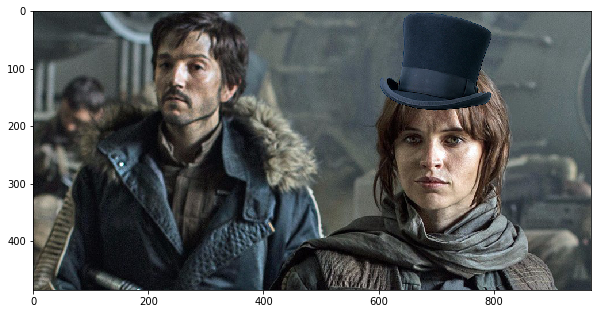

In [128]:
plt.imshow(pic)